In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('sea cliff.jpeg',1)
image_rgb =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

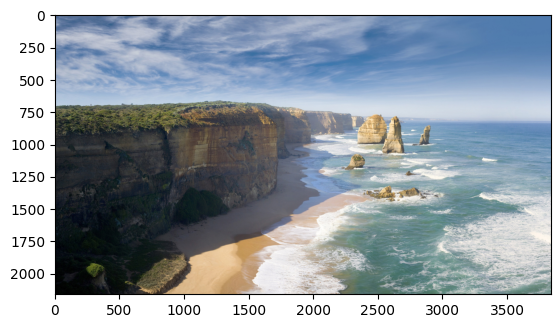

In [3]:
plt.imshow(image_rgb)

In [12]:
import numpy as np
matrix = np.ones(image_rgb.shape,dtype='uint8')*50

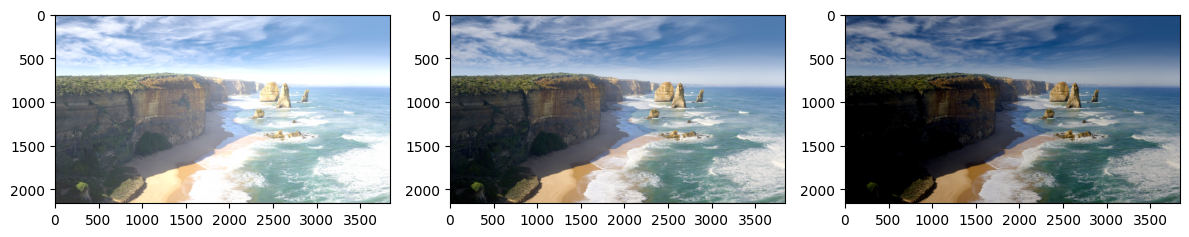

In [18]:
plt.figure(figsize=
           (12,8))
bright = cv2.add(image_rgb,matrix)
dark = cv2.subtract(image_rgb,matrix)
plt.subplot(131)
plt.imshow(bright)
plt.subplot(132)
plt.imshow(image_rgb)
plt.subplot(133)
plt.imshow(dark)
plt.tight_layout()

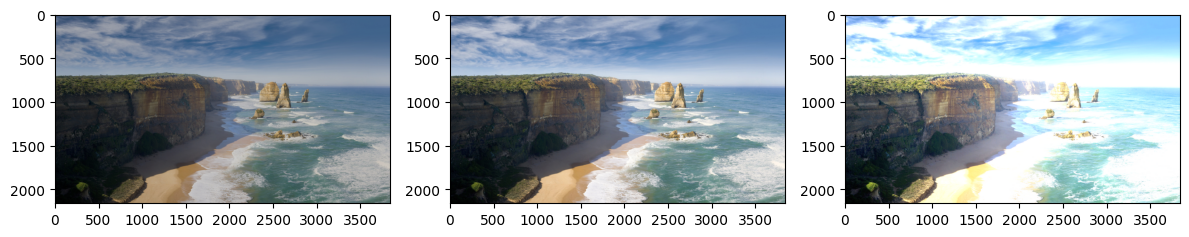

In [43]:
plt.figure(figsize=(12,8))
matrix1 = np.ones(image_rgb.shape)*0.8
martrix2 = np.ones(image_rgb.shape)*1.6

low_contrast = np.uint((cv2.multiply(np.float64(image_rgb),matrix1)))
high_contrast = np.uint(np.clip((cv2.multiply(np.float64(image_rgb),martrix2)),0,255))

plt.subplot(131);plt.imshow(low_contrast);
plt.subplot(132);plt.imshow(image_rgb);
plt.subplot(133);plt.imshow(high_contrast);
plt.tight_layout()

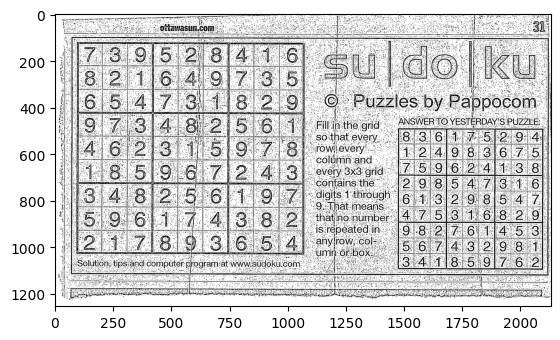

In [82]:
suduku = cv2.imread('suduku.jpeg')
suduku_grey = cv2.cvtColor(suduku,cv2.COLOR_BGR2GRAY)
thresh_image = cv2.adaptiveThreshold(suduku_grey,255,adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,thresholdType=cv2.THRESH_BINARY,blockSize=9,C=6)

plt.imshow(thresh_image,cmap='grey')

In [84]:
cv2.namedWindow('Preview',cv2.WINDOW_NORMAL)

source = cv2.VideoCapture(0)
while cv2.waitKey(1) != 27:
    ret,frame = source.read()
    if not ret:
        break
    cv2.imshow('Preview',frame)
    
source.release()
cv2.destroyWindow('Preview')

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")
    
    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)
    
    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])
    
        print("Done")
    
    except Exception as e:
        print("\nInvalid file.", e)
    
URL = r"https://www.dropbox.com/s/qa1hsyxt66pvj02/opencv_bootcamp_assets_NB10.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB10.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

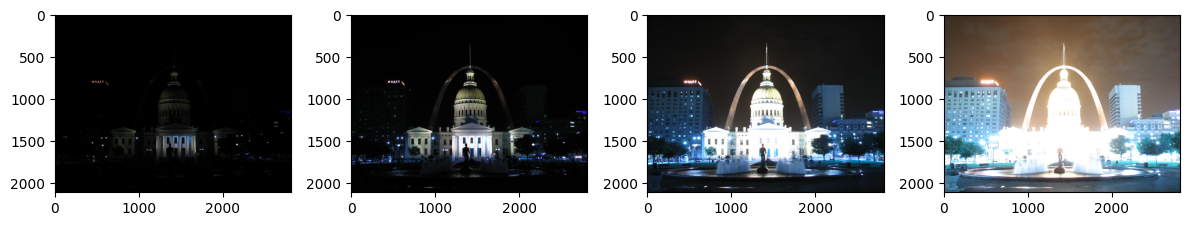

In [17]:
filenames = ["img_0.033.jpg", "img_0.25.jpg", "img_2.5.jpg", "img_15.jpg"]
plt.figure(figsize=(12,8))
for i,files in enumerate(filenames):
    im = cv2.imread(files)
    plt.subplot(1,4,i+1)
    plt.imshow(im)

plt.tight_layout()

In [18]:
	
def readImagesAndTimes():
    filenames = ["img_0.033.jpg", "img_0.25.jpg", "img_2.5.jpg", "img_15.jpg"]

    times = np.array([1 / 30.0, 0.25, 2.5, 15.0], dtype=np.float32)

    images = []
    for filename in filenames:
        im = cv2.imread(filename)
        images.append(im)

    return images, times

images, times = readImagesAndTimes()

alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

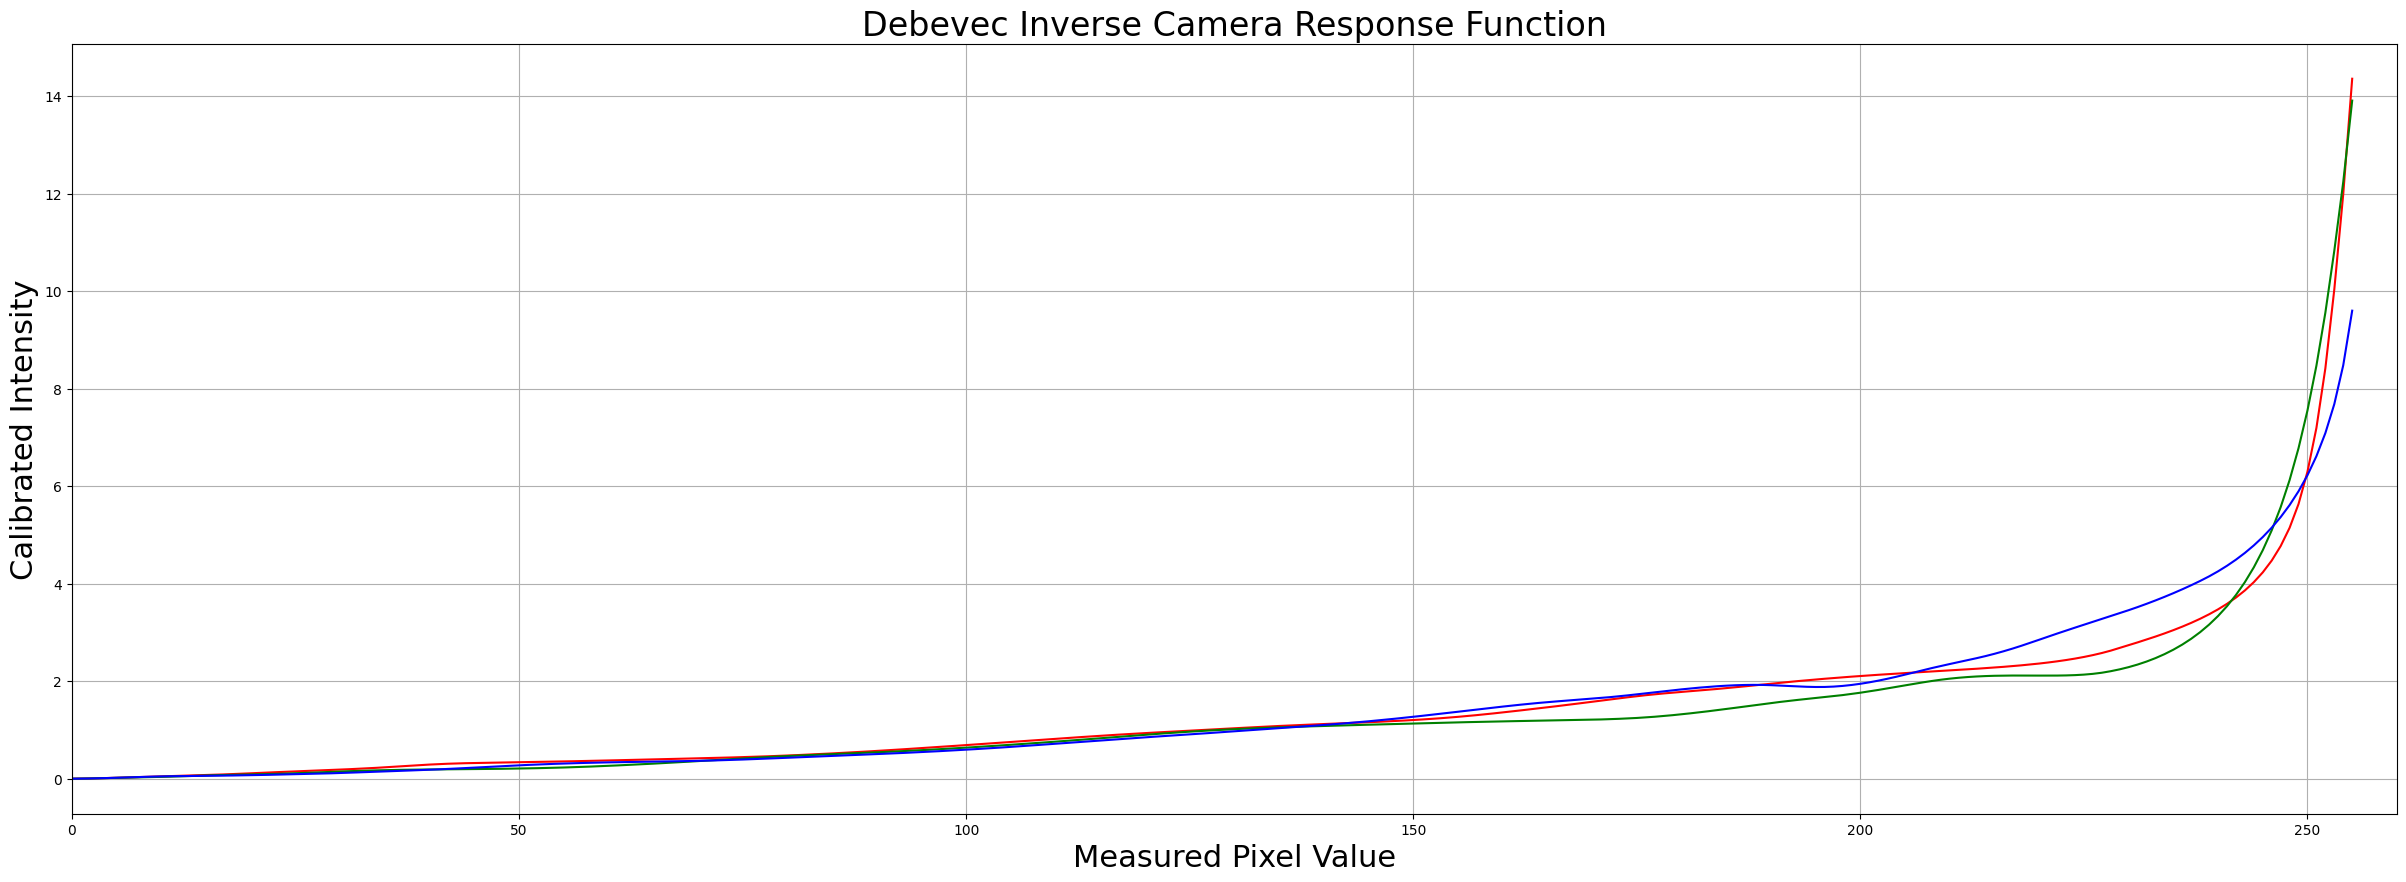

In [19]:
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

# Plot CRF
x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)

ax = plt.figure(figsize=(30, 10))
plt.title("Debevec Inverse Camera Response Function", fontsize=24)
plt.xlabel("Measured Pixel Value", fontsize=22)
plt.ylabel("Calibrated Intensity", fontsize=22)
plt.xlim([0, 260])
plt.grid()
plt.plot(x, y[:, 0], "r", x, y[:, 1], "g", x, y[:, 2], "b")

In [20]:
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


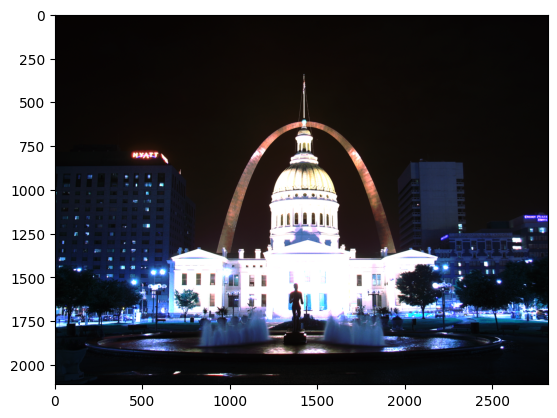

In [21]:
plt.imshow(hdrDebevec)

saved ldr-Mantiuk.jpg


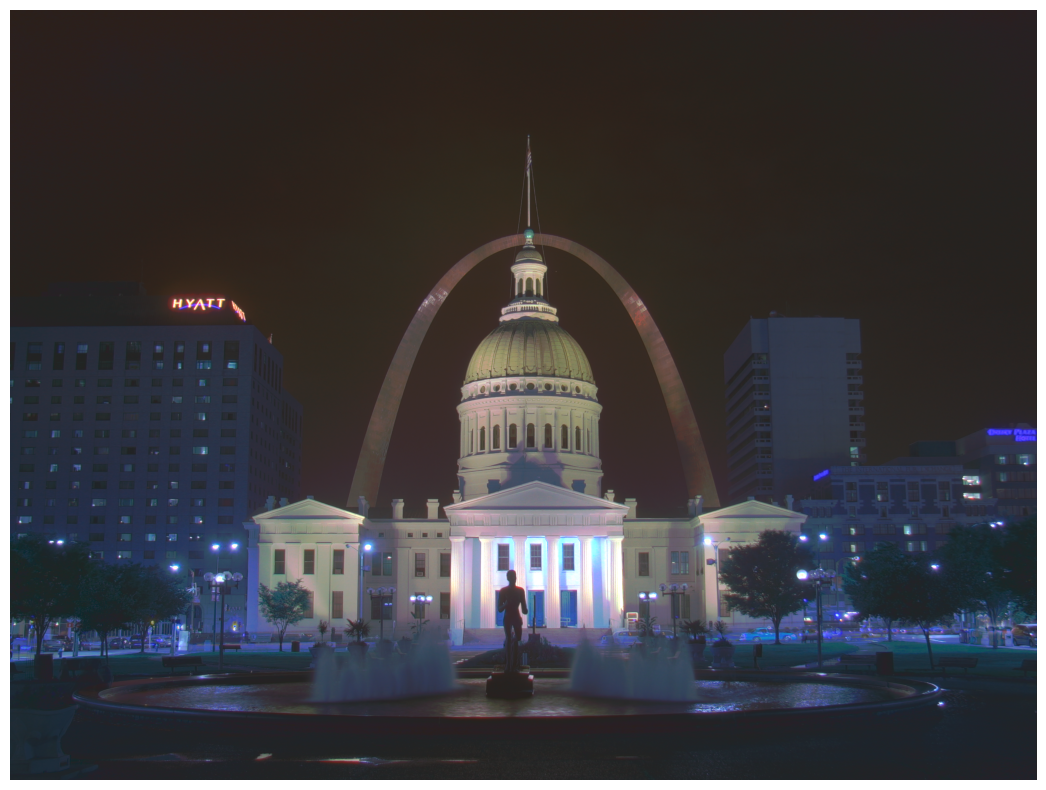

In [29]:
tonemapMantiuk = cv2.createTonemapMantiuk(2.2, 0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
ldrMantiuk = 3 * ldrMantiuk

plt.figure(figsize=(20, 10));plt.imshow(np.clip(ldrMantiuk, 0, 1));plt.axis("off")

cv2.imwrite("ldr-Mantiuk.jpg", ldrMantiuk * 255)
print("saved ldr-Mantiuk.jpg")